# Procesamiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import seaborn as sns
import sys
#sys.path.append('../Code')
#from Plots import boxplotAndHist


### Eliminado

#### Duplicados

Tenemos 5 duplicados

In [2]:
df = pd.read_csv("../datasets/synthetic.csv")
print("Cantidad:",  df.duplicated().sum())


Cantidad: 5


Los eliminamos "inplace", es decir no se retorna una vista del dataset

In [3]:
df.drop_duplicates(inplace=True)


#### Indice

Si la naturaleza de los datos me lo permite puedo transformar id en indice del dataframe

In [4]:
df.head()

,id,Weight,Heigth,CorrPar01,CorrPar02,CorrTot01,CorrTot02,column90PercentNulls,columnBarValues,columnTwoNulls,SomeNulls,columnOutliers,Salary,ActStatus,date
0,1,64.184087,168.070999,0.999034,30.903812,-2.260001,-178.898457,NaN,50.998150,100.148133,97.131918,1606.049621,NaN,CUENTAPROPISTA,2023-01-18
1,2,46.126412,181.077266,-0.677798,-95.246768,0.339275,26.856515,NaN,49.420113,94.742504,NaN,1287.601872,1258.474418,CUENTAPROPISTA,2023-12-12
2,3,69.063778,152.707241,-0.231849,5.635023,-0.658232,-52.104707,NaN,50.370909,102.491667,116.824604,1027.802696,515.504684,CUENTAPROPISTA,2023-08-18
3,4,66.387157,167.112693,1.510159,137.983091,0.480864,38.064474,NaN,50.773667,95.569450,118.940471,310.666079,NaN,EMPLEADO,2023-11-28
4,5,51.474388,164.994484,0.104447,31.914088,0.002291,0.181320,NaN,47.119344,101.490901,94.929601,560.070216,531.010266,EMPLEADO,2023-06-30


In [5]:
df.set_index("id", inplace=True)

In [6]:
df

,Weight,Heigth,CorrPar01,CorrPar02,CorrTot01,CorrTot02,column90PercentNulls,columnBarValues,columnTwoNulls,SomeNulls,columnOutliers,Salary,ActStatus,date
id,,,,,,,,,,,,,,
1,64.184087,168.070999,0.999034,30.903812,-2.260001,-178.898457,NaN,50.998150,100.148133,97.131918,1606.049621,NaN,CUENTAPROPISTA,2023-01-18
2,46.126412,181.077266,-0.677798,-95.246768,0.339275,26.856515,NaN,49.420113,94.742504,NaN,1287.601872,1258.474418,CUENTAPROPISTA,2023-12-12
3,69.063778,152.707241,-0.231849,5.635023,-0.658232,-52.104707,NaN,50.370909,102.491667,116.824604,1027.802696,515.504684,CUENTAPROPISTA,2023-08-18
4,66.387157,167.112693,1.510159,137.983091,0.480864,38.064474,NaN,50.773667,95.569450,118.940471,310.666079,NaN,EMPLEADO,2023-11-28
5,51.474388,164.994484,0.104447,31.914088,0.002291,0.181320,NaN,47.119344,101.490901,94.929601,560.070216,531.010266,EMPLEADO,2023-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,80.812405,162.298880,-0.487590,8.636176,-0.380172,-30.093845,81.541661,50.839795,107.914738,106.391526,569.937437,907.569605,EMPLEADO,2023-10-07
99997,82.283450,143.656330,-0.443179,-29.377357,-1.340866,-106.141037,80.101249,48.483392,99.690116,84.237174,298.609019,NaN,EMPLEADO,2023-08-22
99998,52.868150,154.427998,-0.173886,-17.018994,0.576220,45.612768,77.606600,50.729594,103.494936,112.868293,411.169340,1513.565985,EMPLEADO,2023-06-17


#### Nulos

Cuantos Nulos tenemos

In [7]:
df.isna().sum()/df.shape[0]*100

Weight                   0.000
Heigth                   0.000
CorrPar01                0.000
CorrPar02                0.000
CorrTot01                0.000
CorrTot02                0.000
column90PercentNulls    90.000
columnBarValues          0.000
columnTwoNulls           0.002
SomeNulls               10.000
columnOutliers           0.000
Salary                  40.000
ActStatus                5.000
date                     0.000
dtype: float64

La columna "column90PercentNulls" tienen una cantidad muy alta de nulos. Tiendo a pensar en eliminarla o, si presupongo que hay informacion en los faltantes (Son nulos porque no quisieron contestar entonces puede crear nueva columna). Si es simplemente mala calidad de datos y con numero tan grande me inclino por eliminarla. 

In [8]:
df.isna().sum()/df.shape[0]*100

Weight                   0.000
Heigth                   0.000
CorrPar01                0.000
CorrPar02                0.000
CorrTot01                0.000
CorrTot02                0.000
column90PercentNulls    90.000
columnBarValues          0.000
columnTwoNulls           0.002
SomeNulls               10.000
columnOutliers           0.000
Salary                  40.000
ActStatus                5.000
date                     0.000
dtype: float64

In [151]:
#Elimino la columna con 90% de nulos y las dos filas con nulos.
df.drop(columns=["column90PercentNulls"], inplace=True)


La columna que tiene unicamente 2 valores en nulo, le elimino los valores. Si, estoy perdiendo información, ¿Seria mejor imputarlos? Posiblemente.

In [152]:
df = df[~df["columnTwoNulls"].isna()]
#Solucion problema =>
#df = df[~df["columnTwoNulls"].isna()].copy()


Imputamos "Somenulls" utilizando media. Otras alternativas disponibles "median" y "most_frequent"

In [153]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
si.fit(df[["SomeNulls"]])


SimpleImputer()

Cuidado: esta imputacion sobre todo el conjunto de datos debe ser tomada como una primera aproximación. Veremos mas adelante una enfoque mas profesional.

In [154]:
si.transform(df[["SomeNulls"]])

array([[ 97.13191759],
       [100.07932149],
       [116.82460444],
       ...,
       [112.86829321],
       [100.07932149],
       [ 88.80120584]])

In [155]:
df.loc[:,"SomeNulls"] = si.transform(df[["SomeNulls"]])

El "ActStatus" es categorico, imputamos con most_frequent

In [156]:
print(df["ActStatus"].unique())


['CUENTAPROPISTA' 'EMPLEADO' nan]


Hago el fit y el transform en una unica operación

In [157]:
df.loc[:,"ActStatus"] = SimpleImputer(strategy="most_frequent").fit_transform(df[["ActStatus"]])

Conservo la no respuesta en cuanto a salario.

In [158]:
#df = df.copy()
df["RespondeSalario"] = df["Salary"].isna()

¿Porque este warning? Porque actualmente df no es mas que una vista del original. Estoy agregando una columna a una vista. ¿Es realmente lo que quiero? - Volver al punto que genera el problema y resolverlo -

#### Procesamiento de datos categoricos.


¿Cuantas categorias manejo?

In [159]:
df = pd.DataFrame({"columnaCategoricaOrdinal": ["Grande", "Grande", "Mediano", "Peque", "Grande", "Peque", "Grande"]})
df["columnaCategoricaOrdinal"].unique()

array(['Grande', 'Mediano', 'Peque'], dtype=object)

Es una cantidad manejable y tienen caracter ordinal, digamos 0,1,2 => Peque, Mediano, Grande
Al ser categórica de caracter ordinal la podemos convertir a numeros. Existen varias formas


Via apply o map. Visualmente sencillo pero poco automatizable dentro de la infraestructura sklearn

In [160]:
dic_map = {"Grande": 3, "Mediano": 2, "Peque": 1}
df.loc[:, "col_catOrdViaApply"] = df["columnaCategoricaOrdinal"].apply(lambda x: dic_map[x])
df.loc[:, "col_catOrdViaMap"] = df["columnaCategoricaOrdinal"].map(dic_map)
df

,columnaCategoricaOrdinal,col_catOrdViaApply,col_catOrdViaMap
0,Grande,3,3
1,Grande,3,3
2,Mediano,2,2
3,Peque,1,1
4,Grande,3,3
5,Peque,1,1
6,Grande,3,3


Podemos utilizar OrdinalEncoder

In [161]:
# La lista "categories" marca el orden de las categorías 
ord_enc = OrdinalEncoder(categories=[["Peque", "Mediano", "Grande"]], dtype=int)
df["col_catOrdViaOrdinalEncoder"] = ord_enc.fit(df[["columnaCategoricaOrdinal"]]).transform(df[["columnaCategoricaOrdinal"]])
df.head()

,columnaCategoricaOrdinal,col_catOrdViaApply,col_catOrdViaMap,col_catOrdViaOrdinalEncoder
0,Grande,3,3,2
1,Grande,3,3,2
2,Mediano,2,2,1
3,Peque,1,1,0
4,Grande,3,3,2


Cuidado, nos quedamos con todas las columnas con el único propósito de demostración. Ambas tienen datos redundantes.

Convertir un categórico no ordinal, via get_dummies

In [196]:
df = pd.DataFrame({"columnaCategorica": ["Verde", "Azul", "Rojo", "Amarillo", "Verde", "Verde"],
                   "columnaGeneral":[1,2,3,4,5,6]})
pd.get_dummies(df, columns=["columnaCategorica"], drop_first=True)



,columnaGeneral,columnaCategorica_Azul,columnaCategorica_Rojo,columnaCategorica_Verde
0,1,False,False,True
1,2,True,False,False
2,3,False,True,False
3,4,False,False,False
4,5,False,False,True
5,6,False,False,True


Convertir un categórico no ordinal via OneHotEncoder, similar a get_dummies pero "automatizable" en pipelines de sklearn

In [222]:
df = pd.DataFrame({"columnaCategorica": ["Verde", "Azul", "Rojo", "Amarillo", "Verde", "Verde"],
                   "columnaGeneral":[1,2,3,4,5,6]})
oh = OneHotEncoder(drop="first", sparse_output=False) #o sparse=False, cambio en alguna version de sklearn
oh.fit(df[["columnaCategorica"]])
oh.transform(df[["columnaCategorica"]])


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

Resultado esperado pero...perdi los nombre de las columnas originales, aunque siguen en el objeto

In [223]:
oh.get_feature_names_out()

array(['columnaCategorica_Azul', 'columnaCategorica_Rojo',
       'columnaCategorica_Verde'], dtype=object)

In [224]:
df.loc[:, oh.get_feature_names_out()] = oh.transform(df[["columnaCategorica"]]).astype(int)
df


,columnaCategorica,columnaGeneral,columnaCategorica_Azul,columnaCategorica_Rojo,columnaCategorica_Verde
0,Verde,1,0,0,1
1,Azul,2,1,0,0
2,Rojo,3,0,1,0
3,Amarillo,4,0,0,0
4,Verde,5,0,0,1
5,Verde,6,0,0,1


Siempre es posible volver los datos originales

In [225]:
oh.inverse_transform(df[oh.get_feature_names_out()])

array([['Verde'],
       ['Azul'],
       ['Rojo'],
       ['Amarillo'],
       ['Verde'],
       ['Verde']], dtype=object)

Falta LabelEncoder => esta pensado para "encodiar" targets y no predictoras.

#### También es posible tranformar datos numéricos en categoricos via binning o discretización

<Axes: >

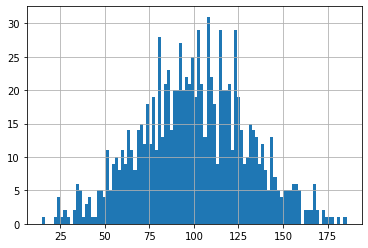

In [173]:
from sklearn.preprocessing import KBinsDiscretizer
mean = 100
std_dev = 30
df = pd.DataFrame({"Altura": np.clip(np.random.normal(loc=mean, scale=std_dev, size=1000), 0, 210)})
# Datos de ejemplo
df["Altura"].hist(bins=100)


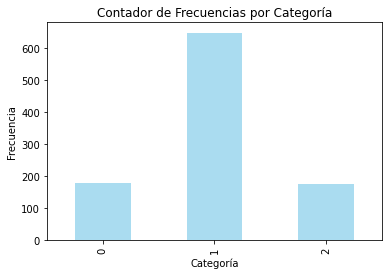

In [174]:
#Divide los datos continuos en intervalos
#'uniform' => igual ancho
#'quantile' => igual cantidad de elementos
#'kmeans' => Basado en cercania'
#encode = {‘onehot’, ‘onehot-dense’, ‘ordinal’},
#subsample=>Maximum number of samples, used to fit the model,
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform', subsample=None)
# Aplicar el binning a los datos
df.loc[:, "Altura"] = disc.fit_transform(df).astype(int)
#df.hist(column="Altura", bins=100)
frq = df['Altura'].value_counts()
frq.sort_index().plot(kind="bar", color='skyblue', alpha=0.7)
plt.title('Contador de Frecuencias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


Esto puede ser util para suavizar el ruido,  mejorar la interpretabilidad de los datos o en modelos que requieran datos discretos.

Con inverse_transform podemos volver al dato "real", pero cuidado no al valor anterior sino al valor real agrupado.

In [187]:
df["Altura_recuperada"] = disc.inverse_transform(df[["Altura"]])
np.sort(df["Altura_recuperada"].unique())


array([ 43.37259547, 100.2773476 , 157.18209974])

¿Podemos usando SimpleInputer imputar la media de todos a los valores superiores a determinado limite?

In [188]:
df = pd.DataFrame({"Age": [15,15,16,20,25,25,28,170,180,190,49,50,55,58,58,58,60]})


In [192]:
df.loc[df["Age"]>160, ["Age"]] = np.nan
si = SimpleImputer(strategy="mean")
si.fit_transform(df)

array([[15.],
       [15.],
       [16.],
       [20.],
       [25.],
       [25.],
       [28.],
       [38.],
       [38.],
       [38.],
       [49.],
       [50.],
       [55.],
       [58.],
       [58.],
       [58.],
       [60.]])

La forma de automatizar esto queda para próximas clases.

### Feature engineering 
#### Columna IMC.
Agregamos una nueva columna manualmente. En este caso se información que el "experto" considera razonable para la mejora del modelo. Veremos en el futuro el agregado como la eliminacion de las columnas por métodos automáticos.

In [193]:
df = pd.read_csv("../datasets/alturas-pesos.csv")
df.loc[:, "IMC"] = df["Peso"]/(df["Altura"]/100)**2
df

,Sexo,Peso,Altura,IMC
0,Hombre,109,187,31.170465
1,Hombre,73,174,24.111507
2,Hombre,96,188,27.161612
3,Hombre,99,182,29.887695
4,Hombre,93,177,29.684956
...,...,...,...,...
9995,Mujer,62,168,21.967120
9996,Mujer,77,170,26.643599
9997,Mujer,58,162,22.100290
9998,Mujer,74,175,24.163265


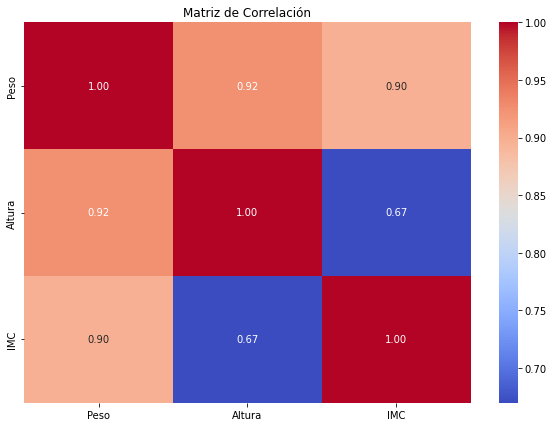

In [194]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,7))
mat = df.select_dtypes(include=['int', 'float']).corr()
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()

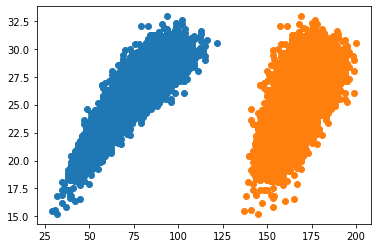

In [64]:
plt.scatter(df["Peso"], df["IMC"])
plt.scatter(df["Altura"], df["IMC"])